In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox,AnchoredOffsetbox
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from PIL import Image
%matplotlib inline
%config InlineBackend.figure_format='retina'
pd.set_option('display.max_rows', 5000)

In [2]:
df = pd.read_csv('cleaned_data.csv')

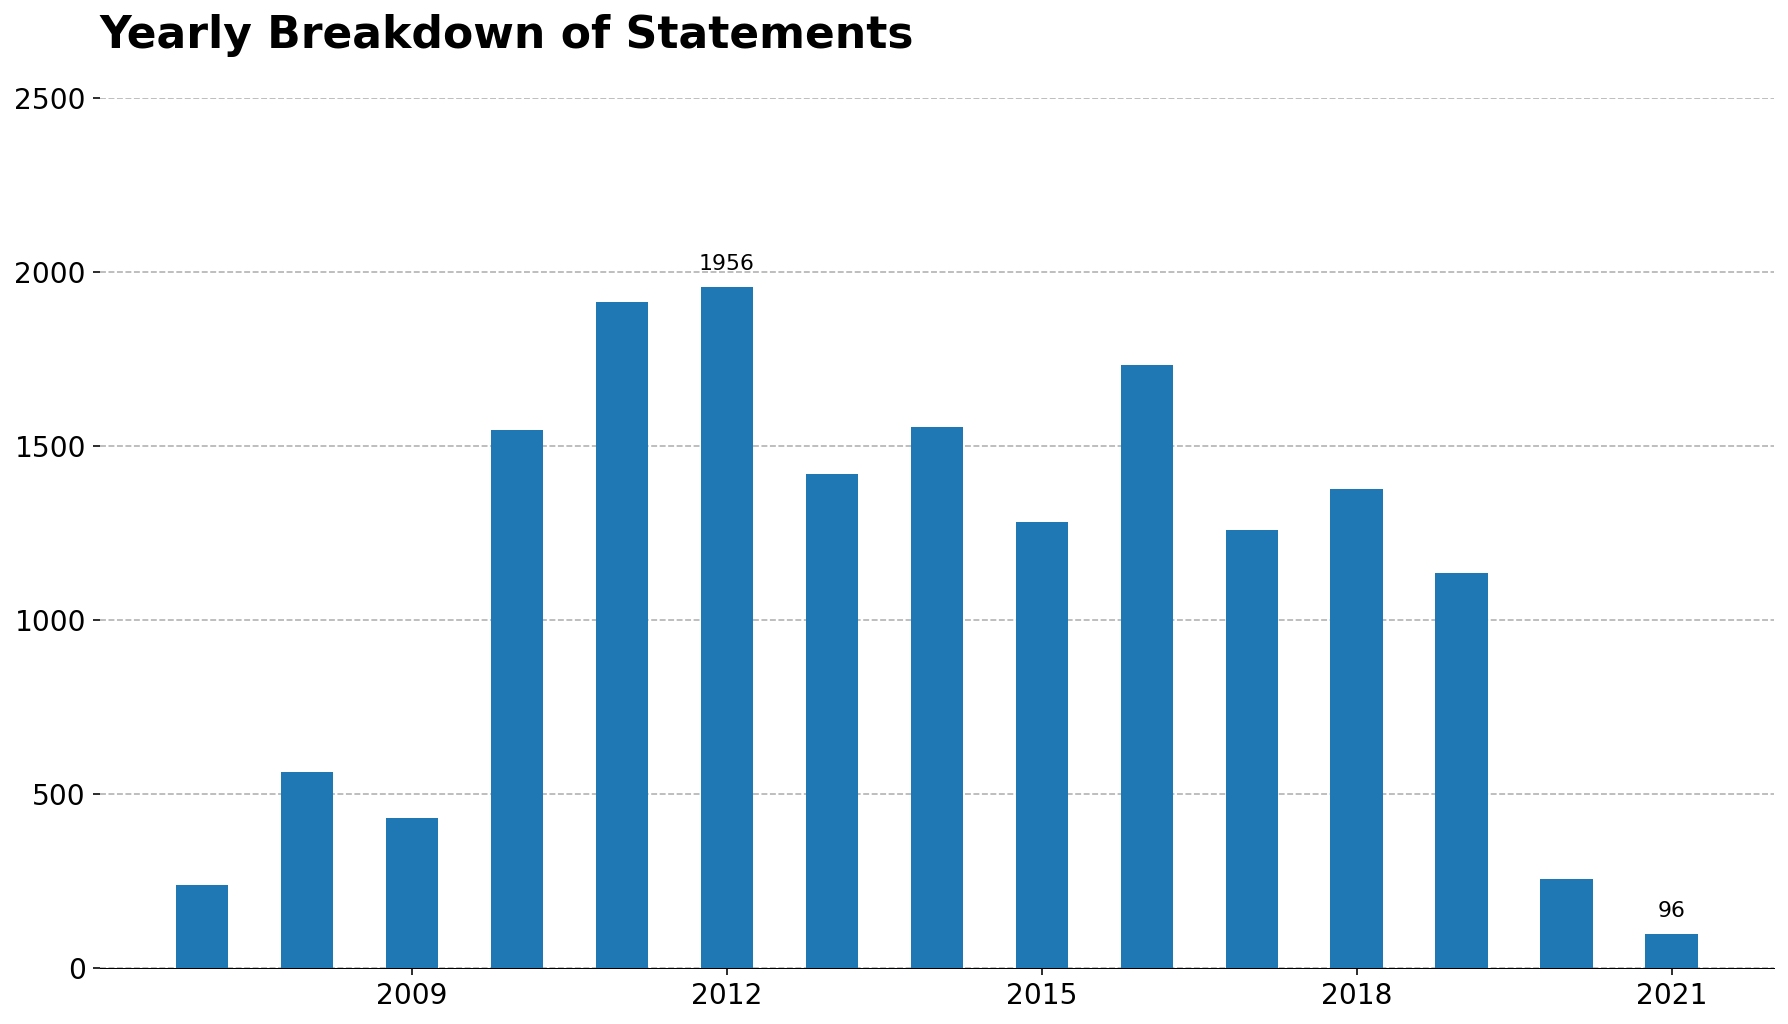

In [3]:
fig, ax = plt.subplots(figsize=(15,8)) 
ax.yaxis.grid(linestyle='--',zorder=0)
ax.bar(sorted(df.year.unique()),df.year.value_counts().sort_index(),width = 0.5,zorder=3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(.5)
ax.set_ylim(0,2500)
ax.set_xticks([2009,2012,2015,2018,2021])     
ax.set_xticklabels([2009,2012,2015,2018,2021],fontsize=14)
ax.set_yticklabels(np.arange(0,2501,500),fontsize=14)
ax.text(2012,2006,'1956',ha='center',fontsize=11)
ax.text(2021,146,'96',ha='center',fontsize=11)
ax.set_title('Yearly Breakdown of Statements',loc='left',pad=25,fontsize=22,weight = 'extra bold')
plt.show()

# Source of Statements

In [4]:
source = df.source.unique().tolist()

In [5]:
org_keywords = ['associate', 'committee', 'the other 98%', 'party', 'republicans','physicians','USA','association','league','post',
 'partnership','think big','illinois','children at risk','union','leaders','republican','coalition','.org','services',
'.com','fund','campaign','amendments','americans','unite','entertainment','initiative','austin','pundit','senate',
'agency','office','PAC','voice','news','chamber','headlines','project','fellowship','politics','.info','liberty',
'report','university','press','institute','times','daily','portal','revolution','world','department','network','school',
'resistance','administration','council','taxpayers','foundation','afscme','district','american','A Stronger Wisconsin',
'aclu','new jersey','AFL-CIO','aarp','government','activist','actionaid','information','wisconsin','america','alliance',
'list','house','democrats','policy','constitution','tax','Ax The Bev Tax','oregon','group','NJ','lives','NC','.net',
'ohio','burger king','cnn','catpac','californian','healthcare','hospital','action','citizen','city','county','portland',
               'clean water','club','college','university','voice','common sense','fund','conservative','consumer','deeds',
               'dccc','street','service','social','democratic','doctors','florida','society','espn','group','fellowship',
                'conference','democracy','floridians','forecast','project','advocates','partners','.us','freedom','friends',
                'future45','generation','georgia','bureau','owners','lottery','polititions','senators','georgian','texas',
                'humanity']

In [6]:
def source_type(x):
    for keyword in org_keywords:
        if keyword.lower() in x.lower() and 'facebook' not in x.lower():
            return 'Organization'
    return 'Individual'

In [9]:
df['source_type'] = df['source'].apply(lambda x: source_type(x))

In [10]:
df.source_type.value_counts()

Individual      14450
Organization     2300
Name: source_type, dtype: int64

In [11]:
data = [816,600,502,339,12193,2300]
recipe = ['Donald Trump, 4.9%','Barack Obama, 3.6%','Bloggers, 3.0%','FB Posts, 2.0%','Other Individuals 72.8%',
          'Organizations 13.8%']
colors = ['#001564','#40508b','#8ca0b9','#b2c6d0','#ccdedf',
         '#f05b25']
image_dict = {'Donald Trump, 4.9%':('trump.png',(1.33,0.03),0.1),'Barack Obama, 3.6%':('obama.png',(1.4,0.15),0.1),
             'FB Posts, 2.0%':('fb.png',(1.35,0.34),0.08),'Bloggers, 3.0%':('blog.png',(1.31,0.25),0.05)}

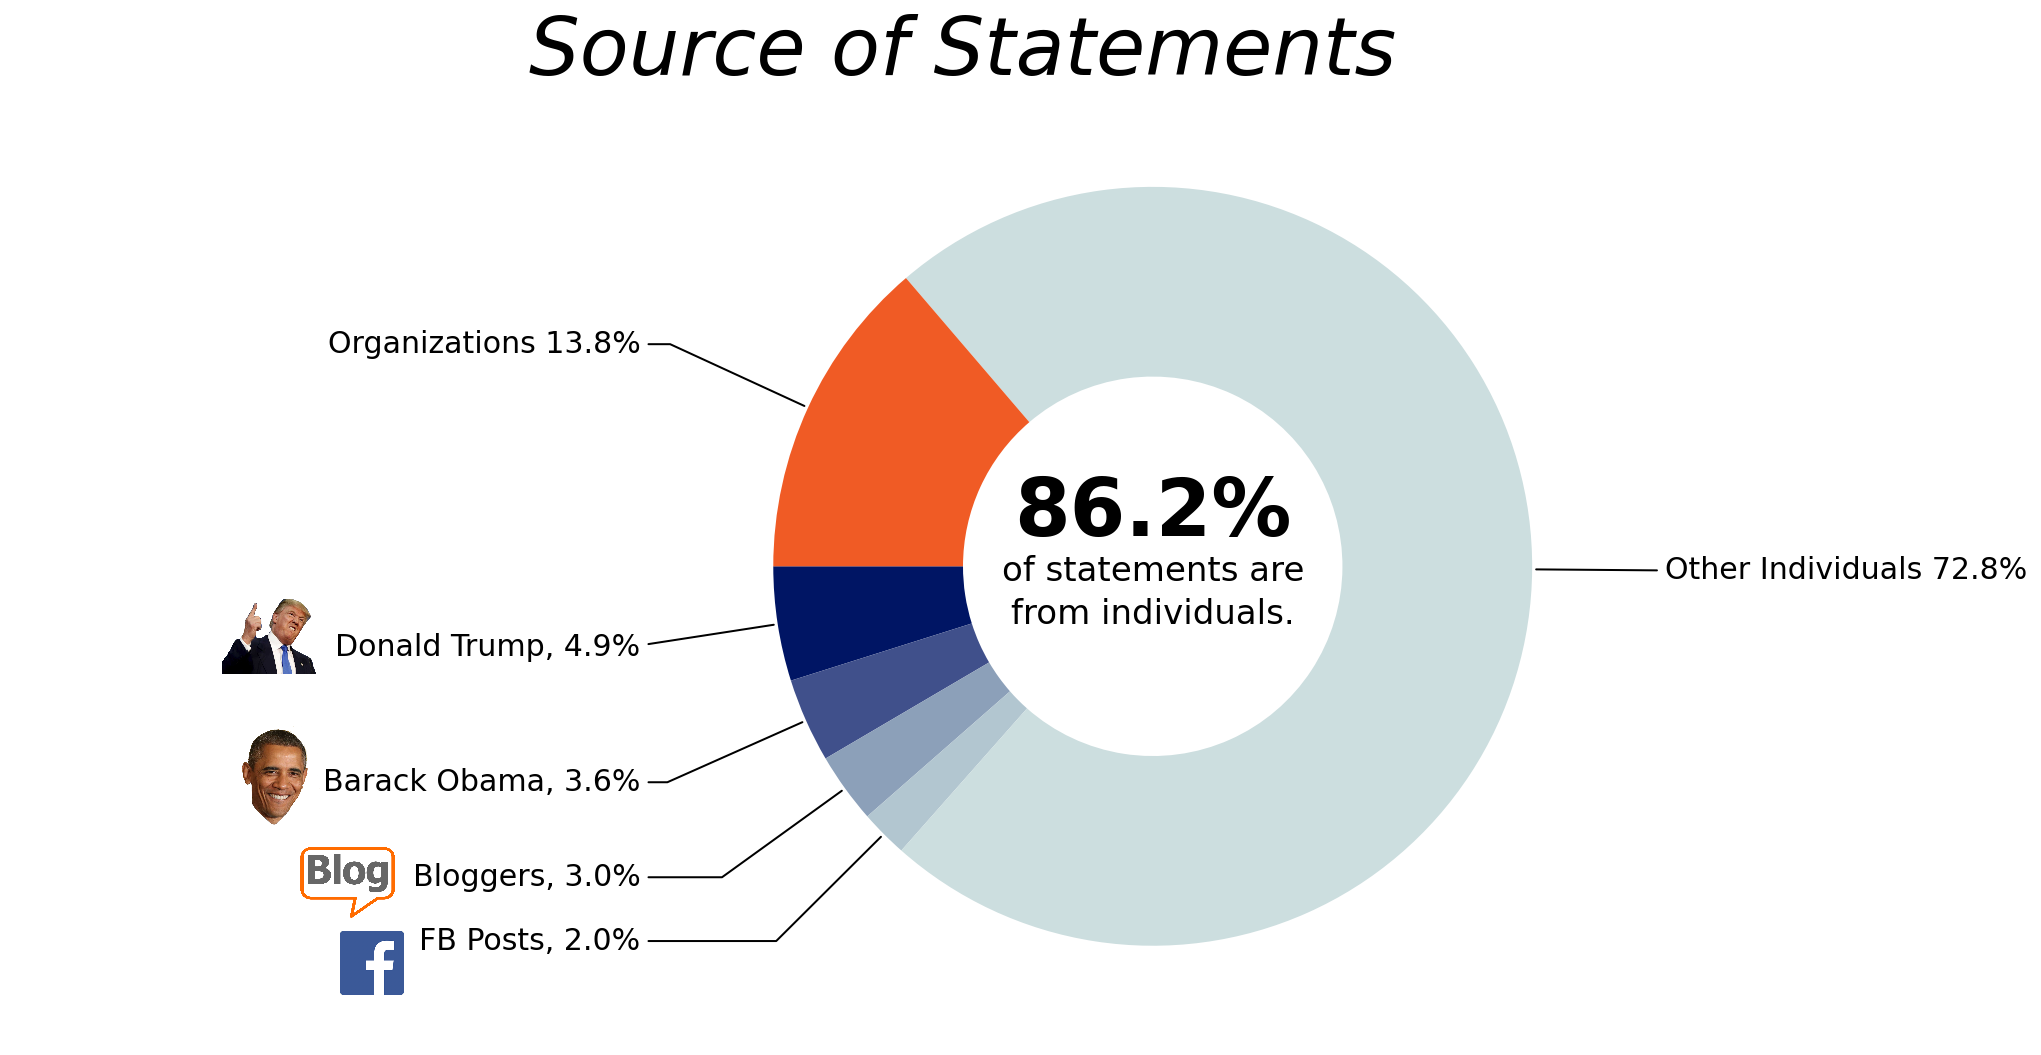

In [12]:
fig, ax = plt.subplots(figsize=(17, 10), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-180,colors=colors)

kw = dict(arrowprops=dict(arrowstyle="-"), zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    if recipe[i] != 'Other':
        ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                    horizontalalignment=horizontalalignment, **kw,fontsize=15)
    if recipe[i] in image_dict.keys():
        img = image_dict[recipe[i]][0]
        m1,m2 = image_dict[recipe[i]][1]
        zoom = image_dict[recipe[i]][2]
        ab = AnnotationBbox(OffsetImage(mpimg.imread(img), zoom=zoom), (x-m1,y-m2),frameon=False)
        ax.add_artist(ab)
ax.text(0,0.08,'86.2%',ha='center',fontweight='extra bold',fontsize=40,c='black')
ax.text(0,-0.037,'of statements are',ha='center',weight='normal',fontsize=17,c='black')
ax.text(0,-0.15,'from individuals.',ha='center',weight='normal',fontsize=17,c='black')
ax.add_artist(ab)
ax.set_xlim(-3,2)
ax.set_title("Source of Statements",fontsize=40,fontstyle='oblique')

plt.savefig('SoS.png',background_color='white',dpi=300)
plt.show()

# Distribution of Veracity

In [13]:
df['renamed_veracity'].value_counts()

false           3424
half-true       3196
mostly-true     3045
mostly-false    2755
true            2359
pants-fire      1895
barely-true       76
Name: renamed_veracity, dtype: int64

In [14]:
data = [1895,3424,2755,76,3196,3045,2359]
recipe = ['Pants on Fire!, 11.3%', 'False, 20.4%','Mostly False, 16.4%',
          'Barely True, 0.5%','Half-True, 14.1%','Mostly True, 18.2%','True, 14.1%']
colors = ['#ff2a23','#f8aa2f','#fbc088','#cbdedf','#8ca0ba','#40508b','#001464']

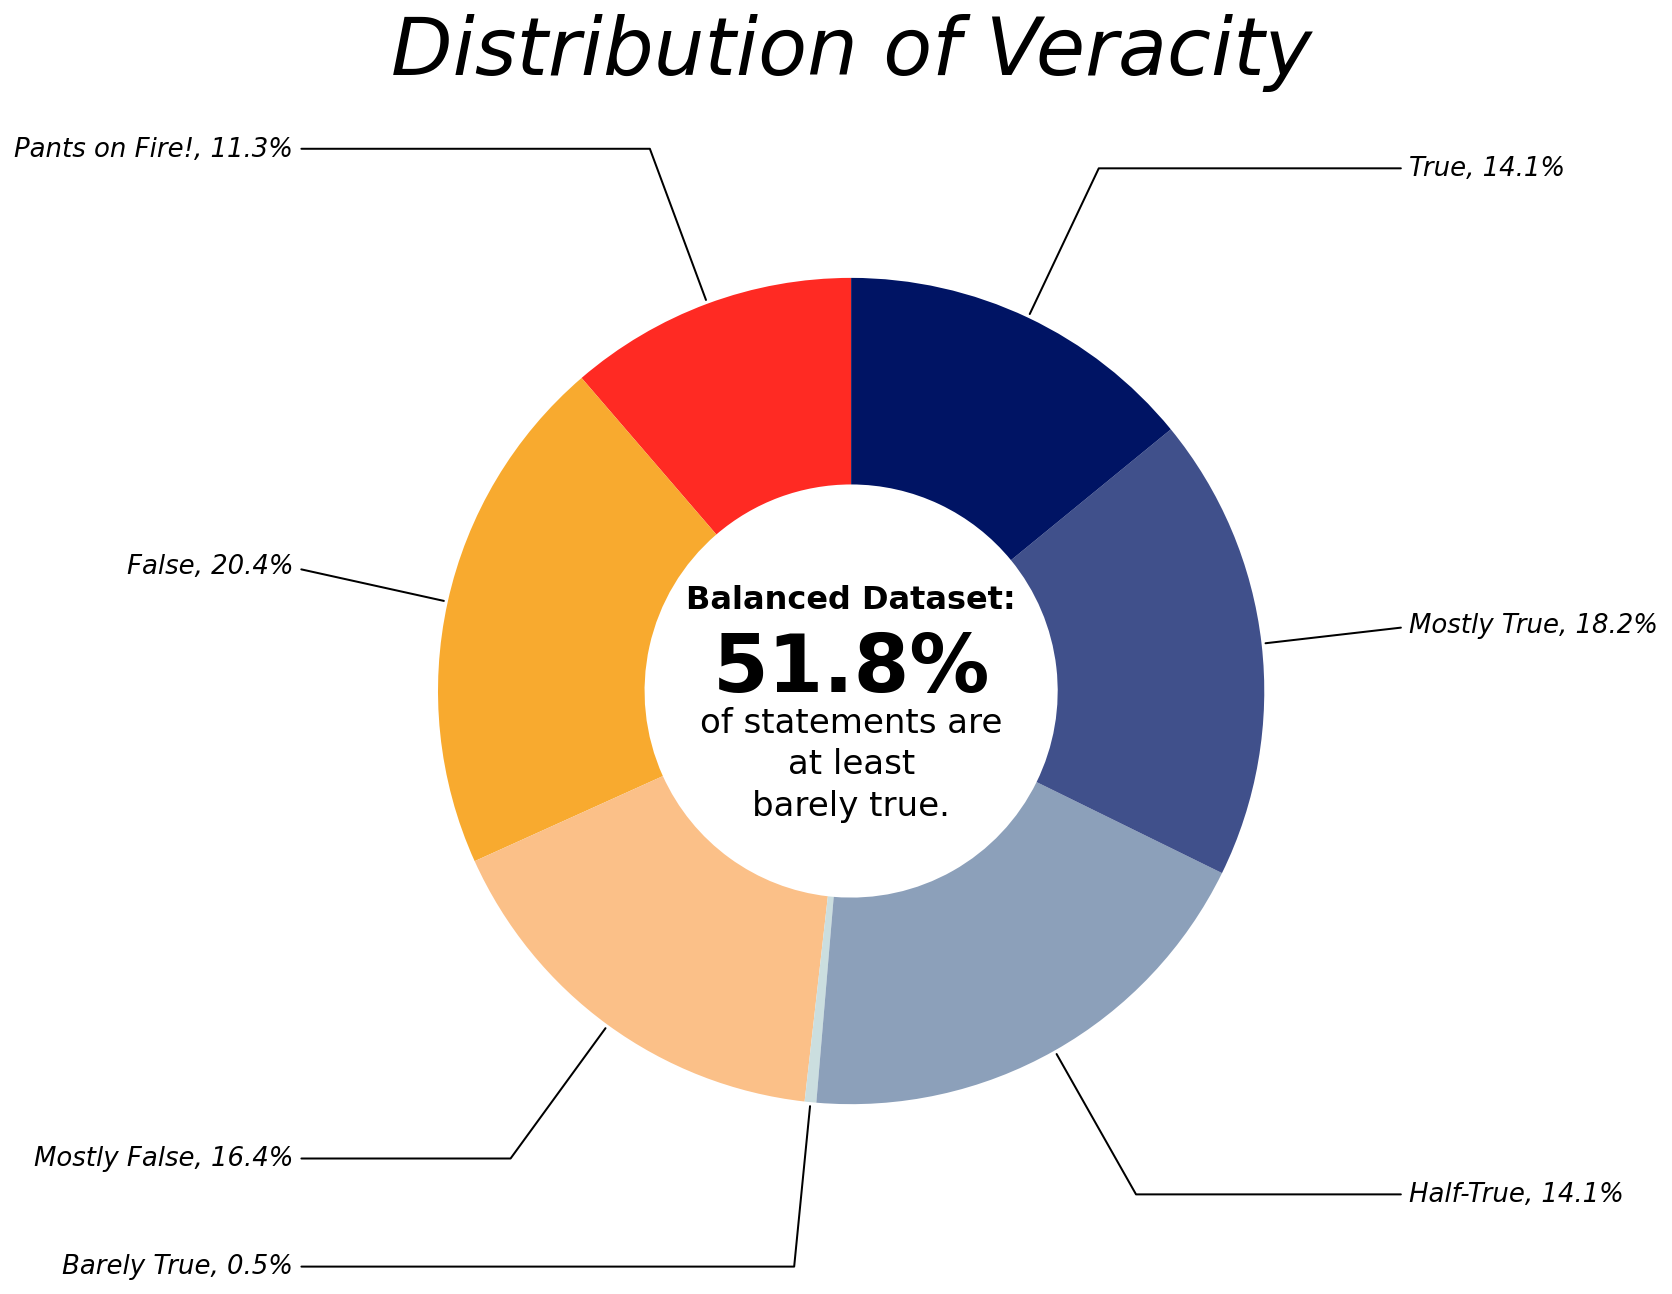

In [15]:
fig, ax = plt.subplots(figsize=(18, 9.5), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-270,colors=colors)

kw = dict(arrowprops=dict(arrowstyle="-"), zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                    fontstyle='italic',horizontalalignment=horizontalalignment, **kw,fontsize=13)
    
ax.text(0,0.20,'Balanced Dataset:',ha='center',weight='bold',fontsize=16,c='black')
ax.text(0,0,'51.8%',ha='center',fontweight='extra bold',fontsize=40,c='black')
ax.text(0,-0.1,'of statements are',ha='center',weight='normal',fontsize=17,c='black')
ax.text(0,-0.2,'at least',ha='center',weight='normal',fontsize=17,c='black')
ax.text(0,-0.3,'barely true.',ha='center',weight='normal',fontsize=17,c='black')
ax.set_title("Distribution of Veracity",fontsize=40,pad=50,fontstyle='oblique')

plt.show()

# Logo

In [16]:
import nltk
from nltk.corpus import stopwords

In [17]:
def one_color_func(word=None, font_size=None, 
                   position=None, orientation=None, 
                   font_path=None, random_state=None):
    h = 160 
    s = 100
    l = 700
    return "hsl({}, {}%, {}%)".format(h, s, l)

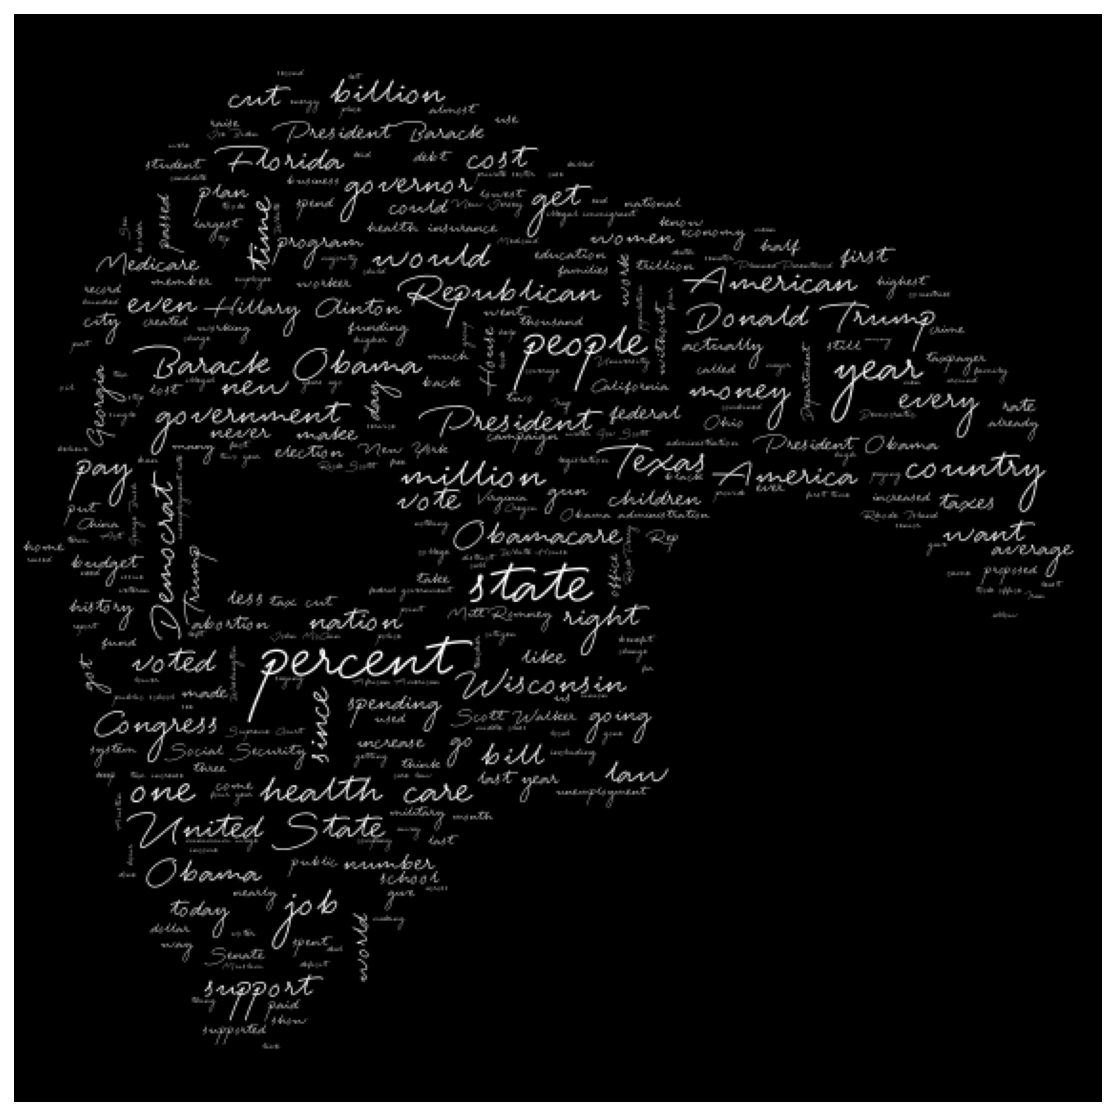

In [18]:
stop_words = stopwords.words('english')
stop_words.extend(['say', 'says', 'said'])


text = df.statement.str.cat(sep=' ')
mask = np.array(Image.open('mask2.jpeg'))
wordcloud = WordCloud(background_color='black',
                      mask=mask,
                      height=600,
                      width=800,
                      max_words=300,
                      random_state=68,
                      max_font_size=45,
                      color_func=one_color_func,
                      stopwords=stop_words,font_path='RespondentMedium_PERSONAL_USE_ONLY.otf')

wordcloud = wordcloud.generate(text, )
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis('off')
plt.show()